<a href="https://colab.research.google.com/github/sousagomide/stable_diffusion/blob/main/secao03_explorando_prompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.11.1
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

In [2]:
import torch
from diffusers import StableDiffusionPipeline

In [ ]:
sd2 = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1', torch_dtype=torch.float16)
sd2.safety_checker = lambda images, clip_input: (images, False)
sd2 = sd2.to('cuda')
sd2.enable_attention_slicing()
sd2.enable_xformers_memory_efficient_attention()

In [4]:
seed = 777

In [5]:
from PIL import Image # Biblioteca para gerar imagens

def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols
  w, h = imgs[0].size
  w, h = int(w * scale), int(h * scale)
  grid = Image.new('RGB', size = (cols * w, rows * h))
  grid_w, grid_h = grid.size
  for i, img in enumerate(imgs):
    img = img.resize((w, h), Image.ANTIALIAS)
    grid.paste(img, box=(i % cols * w, i // cols * h)) # Questão de redimensionamento
  return grid

# Sujeito / objeto

* O assunto/objeto é o que você quer ver na imagem
* Um erro comum é não escrever o suficiente sobre os assuntos, o que deixa muito espaço para a imaginação. Como você quer que pareça? Alguma palavra para descrevê-la que limitaria sua imagem? O que veste?
* Temos que dizer exatamente o que queremos
* Um truque comum é usar nomes de celebridades, tem um efeito forte para controlar a aparência

  0%|          | 0/50 [00:00<?, ?it/s]

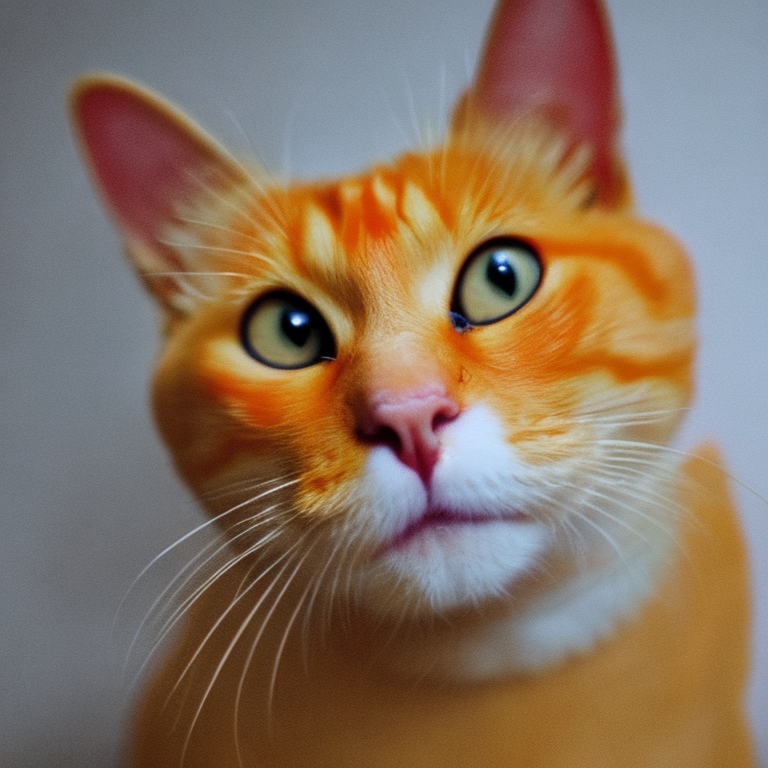

In [6]:
prompt = 'an orange cat'
generator = torch.Generator('cuda').manual_seed(seed)
img = sd2(prompt, generator = generator).images[0]
img

# Ação e local

* O que está fazendo? O que está vestindo? Está de pé, correndo ou flutuando no ar? Qual é o cenário e a cena de fundo?

  0%|          | 0/50 [00:00<?, ?it/s]

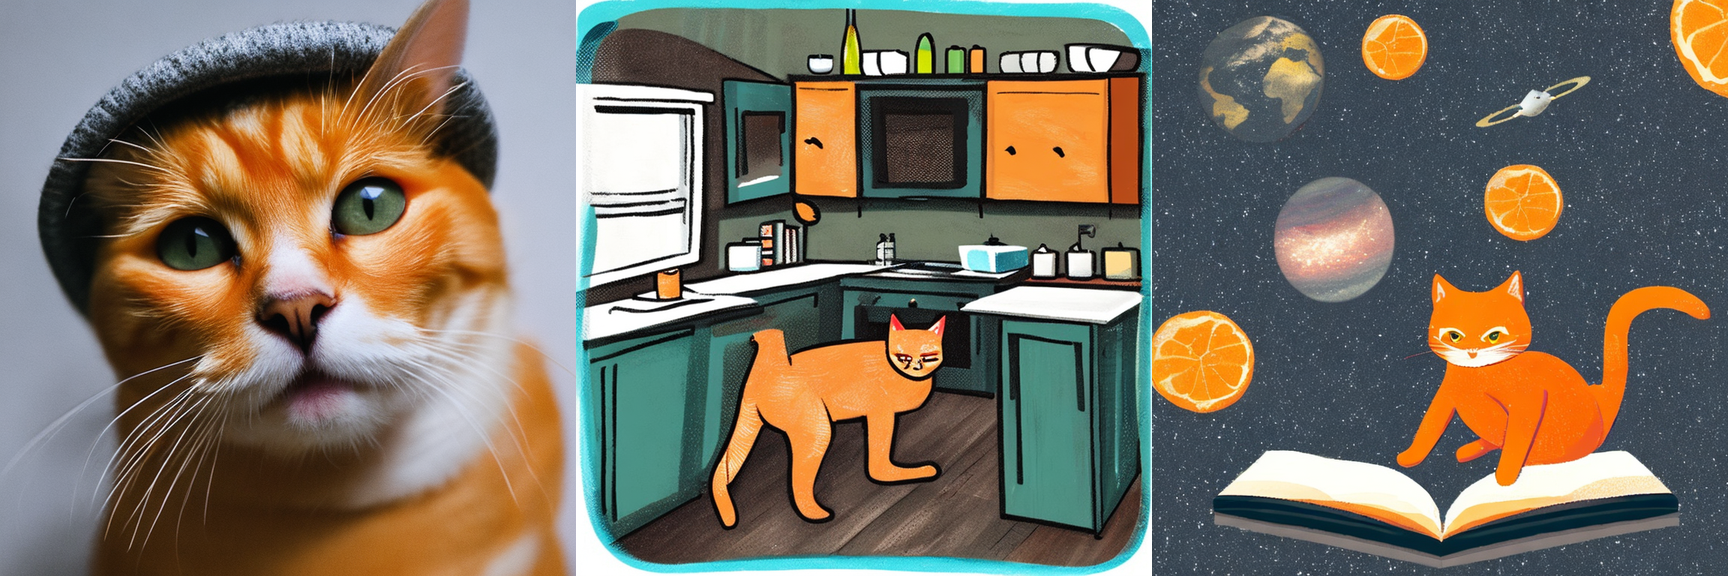

In [7]:
prompt = ['an orange cat wearing a hat',
          'an orange cat reading a book in the kitchen',
          'an orange cat reading a book in space']
generator = torch.Generator('cuda').manual_seed(seed)
imgs = sd2(prompt, generator = generator).images
grid = grid_img(imgs, rows = 1, cols = len(prompt), scale = 0.75)
grid

# Meio / tipo

* O meio (medium), ou tipo, é o material usado para fazer a imagem ou obra de arte. Alguns exemplos são: ilustração, fotografia, pintura a óleo e renderização 3D.
* O meio tem um forte efeito e uma palavra-chave sozinha pode mudar drasticamente o estilo

Palavras-chave úteis

> Painting, Photo, Drawing, 3D redering, etc

> Mais específicos: Oil painting, watercolor painting, Portrait, Sketch, Digital painting, Concept art, Ultra realistic illustration, Underwater portrait, Underwater steampunk



  0%|          | 0/50 [00:00<?, ?it/s]

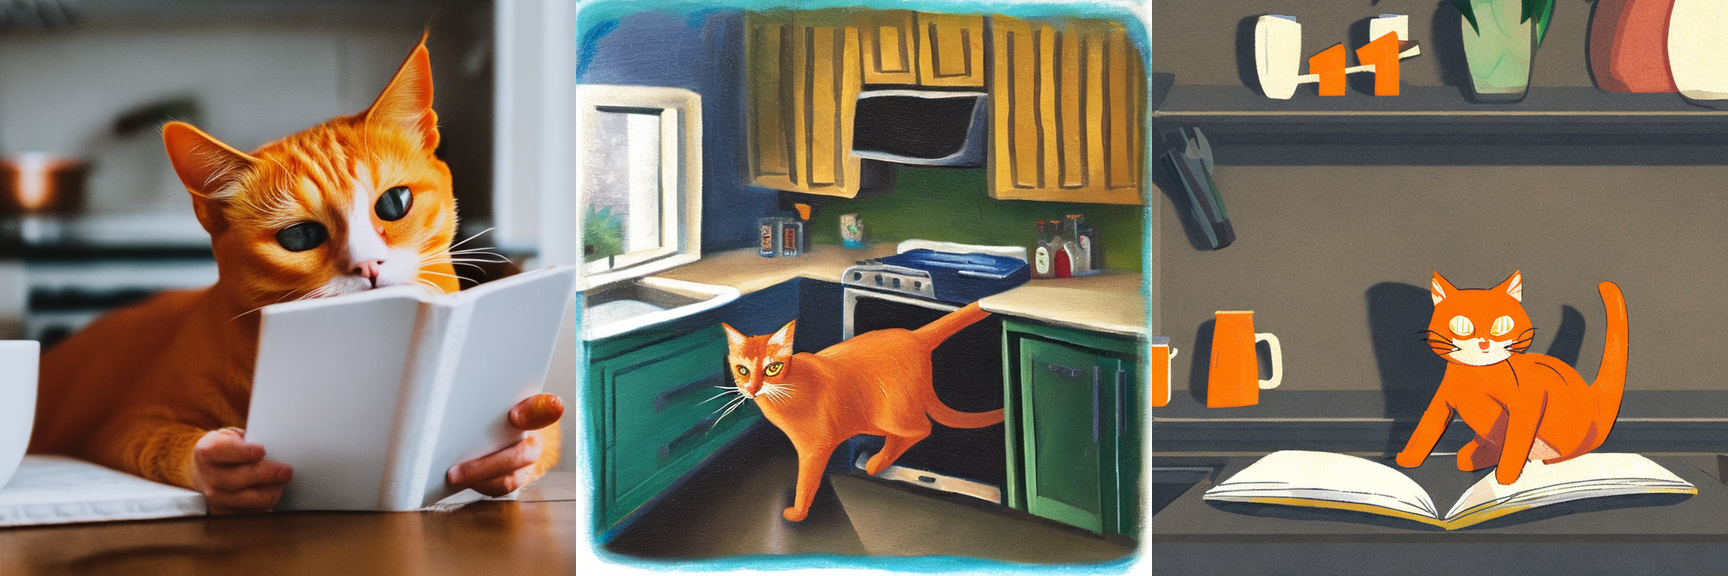

In [8]:
prompt = ['photo of an orange cat reading a book in the kitchen',
          'oil painting of an orange cat reading a book in the kitchen',
          'concept art of an orange cat reading a book in the kitchen']
generator = torch.Generator('cuda').manual_seed(seed)
imgs = sd2(prompt, generator = generator).images
grid = grid_img(imgs, rows = 1, cols = len(prompt), scale = 0.75)
grid

['orange cat reading a book in space, Oil painting', 'orange cat reading a book in space, digital painting', 'orange cat reading a book in space, Underwater steampunk']


  0%|          | 0/50 [00:00<?, ?it/s]

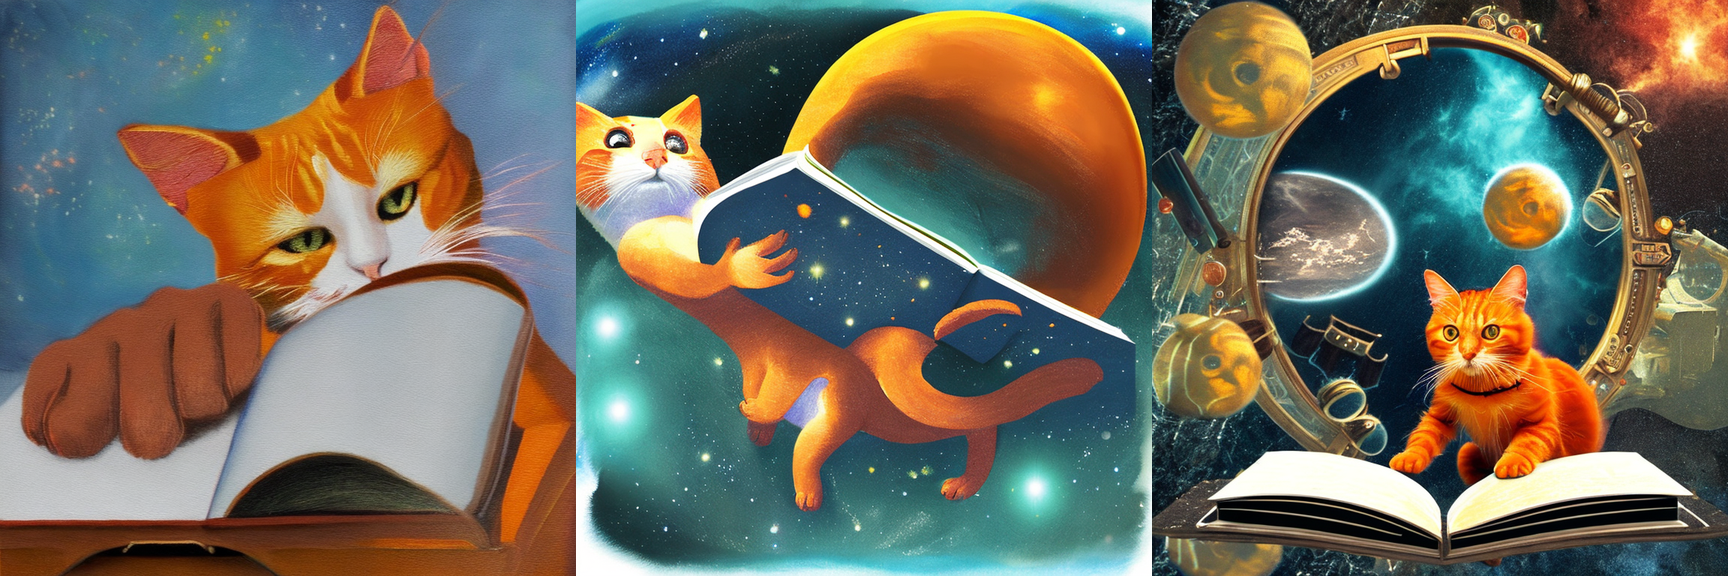

In [11]:
base = 'orange cat reading a book in space'
m_ = [', Oil painting', ', digital painting', ', Underwater steampunk']
prompts = []
for m in m_:
  prompts.append(base + m)
print(prompts)
generator = torch.Generator('cuda').manual_seed(seed)
imgs = sd2(prompts, generator = generator).images
grid = grid_img(imgs, rows = 1, cols = len(prompt), scale = 0.75)
grid

# Estilo

 * Refere-se ao estilo artístico da imagem
 * Exemplos: impressionista, surrealista, arte pop, etc
 * As vezes, não nota-se muita diferença se adicionar mais termos específicos. Isso pode acontecer especialmente em casos nos quais o efeito das palavras-chave usadas já estavam implícitos pelos termos usados anteriormente, como do meio ou nomes de artistas

Palavras-chave úteis
 > realistic, hypeerrealistic, pop-art, modernist, art nouveau, surrealist, etc